In [2]:
import numpy as np
import pandas as pd
from os import walk
import requests
import json
import math
from PIL import Image
from urllib import request
from socket import timeout
from urllib.error import HTTPError, URLError
import matplotlib.pyplot as plt
import random
import time

In [3]:
#google search for the book using google books API
def google_book_search(search_terms):
    max_index = 10
    search_results = pd.DataFrame()
    for start_index in range(max_index):
        url = 'https://books.googleapis.com/books/v1/volumes?q=subject%3A'+search_terms+'&startIndex=' + str(start_index)
        
        response = requests.get(url, verify = False)
        # load data using Python JSON module
        r = response.content
        data = json.loads(r)
        # Normalizing data
        try:
            df = pd.json_normalize(data, record_path =['items'])  
        except:
            continue
        first_row = df.iloc[0]
        first_row_df = df.iloc[:1]
        first_row_df['search_term']=search_terms
        search_results = search_results.append(first_row_df)
        time.sleep(1)
    return search_results

In [4]:
DATA_DIR = "book-covers"

CATEGORIES = next(walk(DATA_DIR), (None, None, []))[1]
print(CATEGORIES)

['Art-Photography', 'Biography', 'Business-Finance-Law', 'Childrens-Books', 'Computing', 'Crafts-Hobbies', 'Crime-Thriller', 'Dictionaries-Languages', 'Entertainment', 'Food-Drink', 'Graphic-Novels-Anime-Manga', 'Health', 'History-Archaeology', 'Home-Garden', 'Humour', 'Medical', 'Mind-Body-Spirit', 'Natural-History', 'Personal-Development', 'Poetry-Drama', 'Reference', 'Religion', 'Romance', 'Science-Fiction-Fantasy-Horror', 'Science-Geography', 'Society-Social-Sciences', 'Sport', 'Stationery', 'Teaching-Resources-Education', 'Technology-Engineering', 'Teen-Young-Adult', 'Transport', 'Travel-Holiday-Guides']


In [78]:
# category = CATEGORIES[0].split("-")

# category

['Art', 'Photography']

In [5]:
def search_book_by_category(category):
    info = pd.DataFrame()
    for search_term in category:
        print(search_term)
        # search_term = 'subject\:'+ c
        info = info.append(google_book_search(search_term))

    google_data = info[['id', 'selfLink', 'volumeInfo.title',
       'volumeInfo.subtitle', 'volumeInfo.authors', 'volumeInfo.publisher',
       'volumeInfo.publishedDate', 'volumeInfo.description','volumeInfo.pageCount', 'volumeInfo.categories',
       'volumeInfo.imageLinks.smallThumbnail','volumeInfo.imageLinks.thumbnail','saleInfo.country', 'search_term'
     ]]
    
    return google_data


In [ ]:
google_data = search_book_by_category(CATEGORIES)

In [29]:
google_data.dropna(subset=['volumeInfo.title', 'volumeInfo.imageLinks.thumbnail'], inplace=True)

In [30]:
google_data = google_data.reset_index()

In [31]:
for index, row in google_data.iterrows():
    print(row)
    break

index                                                                                   0
id                                                                           U7oTDAAAQBAJ
selfLink                                https://books.googleapis.com/books/v1/volumes/...
volumeInfo.title                                   Photography: A Very Short Introduction
volumeInfo.subtitle                                                                   NaN
volumeInfo.authors                                                        [Steve Edwards]
volumeInfo.publisher                                              Oxford University Press
volumeInfo.publishedDate                                                       2006-08-24
volumeInfo.description                  Photographs are an integral part of our daily ...
volumeInfo.pageCount                                                                160.0
volumeInfo.categories                                                               [Art]
volumeInfo

In [13]:
def display_book_samples(google_data):
    for index, row in google_data.iterrows():
        re = request.urlopen(row['volumeInfo.imageLinks.thumbnail'])
        image = Image.open(re)
        print(row['volumeInfo.title'], row['volumeInfo.categories'])
        display(image)

In [14]:
import os
def save_book_cover_image(google_data, book_image_path):
    for id, book_cover_link in zip(google_data['id'], google_data['volumeInfo.imageLinks.thumbnail']):
        re = request.urlopen(book_cover_link, timeout=10)
        
        image = Image.open(re)
        filename = id + '.jpg'
        image_path = os.path.join(book_image_path, filename)
        image = image.save(image_path)
        
        print("Book id: " + id + " saved")
        # If the query is too fast the google book api request protocol will interrupt and return time out error
        re.close()

Photography: A Very Short Introduction ['Art']


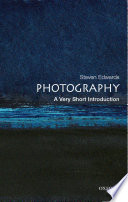

On Photography ['Photography']


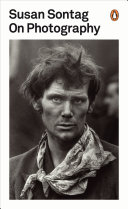

Contemporary Photography and Theory ['Photography']


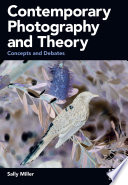

Art and Photography ['Art']


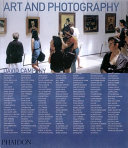

Photography ['Art']


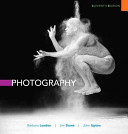

Setting Up a Successful Photography Business ['Art']


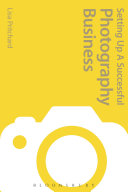

Art Photography ['Photographic criticism']


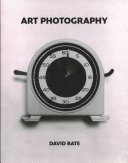

The Routledge Companion to Photography and Visual Culture nan


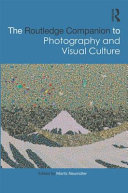

Context and Narrative in Photography ['Photography']


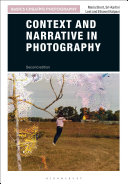

Photography ['Art']


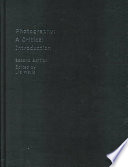

The Very Best of the Daily Telegraph Books of Obituaries ['Biography & Autobiography']


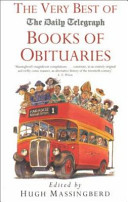

Giannis nan


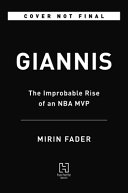

Marquis Who's Who Index to Who's Who Books ['Biography']


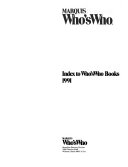

Maverick nan


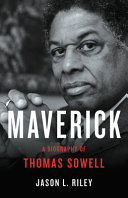

Footsteps to Fame ['Biography']


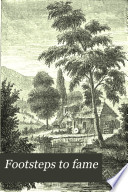

Biographical Dictionary and Synopsis of Books ['Biography']


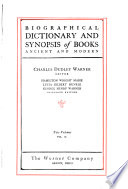

Little People, BIG DREAMS: Treasury ['Juvenile Nonfiction']


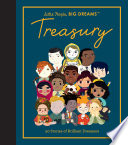

The Life, Travels and Books of Alexander Von Humboldt ['Biography']


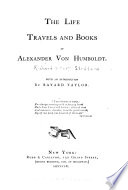

The Girl Who Could Dance in Outer Space ['Juvenile Fiction']


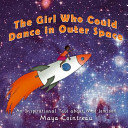

Black Frontiers ['Juvenile Nonfiction']


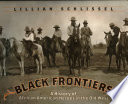

Dictionary of Commercial, Financial and Legal Terms: erg. Aufl ['Business']


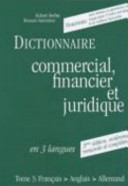

Investment im Iran – Investment in Iran – سرمایه‌گذاری در ایران ['Business & Economics']


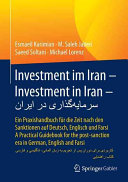

Elsevier's Dictionary of Economics, Business, Finance and Law: P.-I︠A︡ ['Social Science']


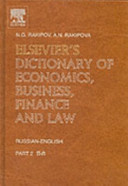

Entrepreneurship, Governance and Ethics ['Philosophy']


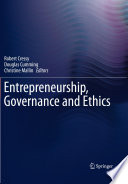

Library of Law, Banking and Business: Banks, finance, investment, credit, collections ['Banks and banking']


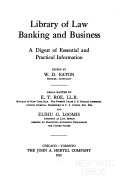

A Reader in International Corporate Finance ['Business & Economics']


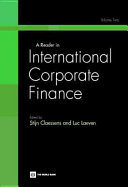

Laws and Regulations in Global Financial Markets ['Business & Economics']


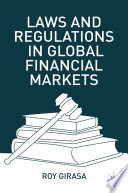

Dictionary of Commercial, Financial and Legal Terms: English ['Business']


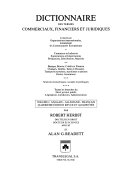

The Day My Kids Stayed Home nan


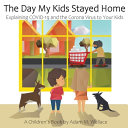

RONA STOLE MY FUN! ['Juvenile Fiction']


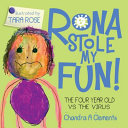

العنف ضد الأطفال العرب ['Children']


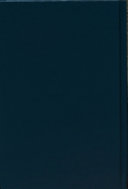

Artisans and Machinery ['Artisans']


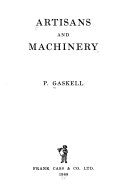

Fragments of a Forgotten People ['Biography & Autobiography']


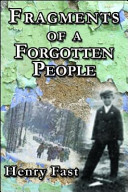

Technology Made Simple for the Technical Recruiter ['Business & Economics']


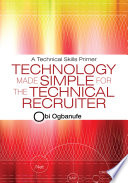

Ecdl/Icdl Advanced Module Am6 Presentations Using Powerpoint 2003 ['Business presentations']


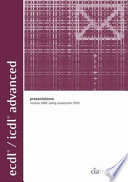

Teach Yourself Basic Computer Skills Windows Vista Edition ['Computing']


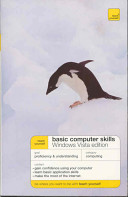

Teach Yourself Basic Computer Skills 2nd Edition ['Computing']


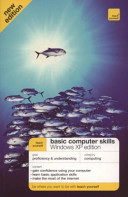

Picture this ['Computer art']


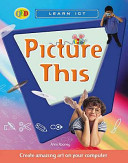

Linux ['Computer programs']


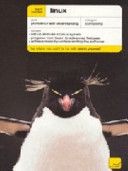

ECDL/ICDL Syllabus 4 Module 5 Databases using Access 2000 ['Computer literacy']


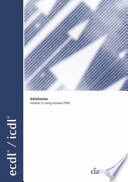

Information Systems Intermediate 2 ['Computing']


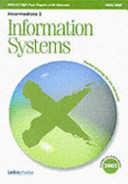

Ecdl/Icdl Syllabus 4 Module 1 Basic Concepts of IT ['Computer literacy']


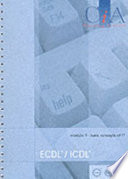

100 Ways of Fun with Circles ['Crafts & Hobbies']


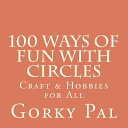

DIY for Dog Lovers ['Crafts & Hobbies']


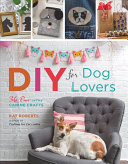

Create Your Own Jewelry Kit-PNK ['Crafts & Hobbies']


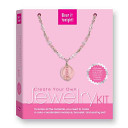

Essentially Soap ['Crafts & Hobbies']


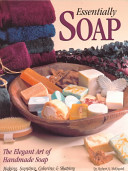

Art on the Rocks ['Art']


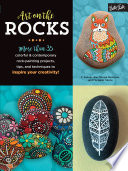

Designer Scrapbooks with Sandi Genovese ['Crafts & Hobbies']


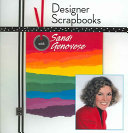

A Knife in the Dark: A Science Fiction Noir Thriller ['Fiction']


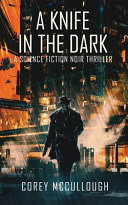

Let the Dead Lie ['Children']


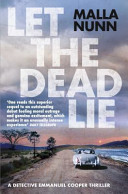

Stolen Ones: A Totally Jaw-dropping and Addictive Crime Thriller ['Fiction']


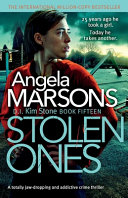

Who Dies Wins ['Crime']


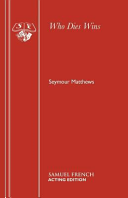

The Cyanide Game ['Corporations']


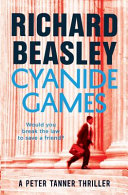

Bad Debts ['Australian fiction']


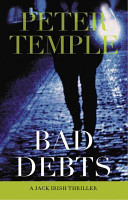

Crime, Histoire & Sociétés ['Crime']


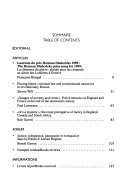

The Professor ['Detective and mystery stories']


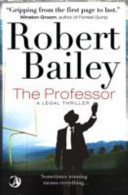

Blue Moon ['Fiction']


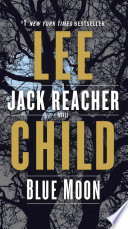

Probable Cause ['Social Science']


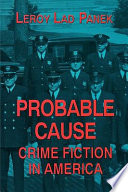

A Siamese-English Dictionary for the Use of Students in Both Languages ['Dictionaries']


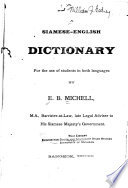

A Siamese-English Dictionary for the Use of Students in Both Languages ['Dictionaries']


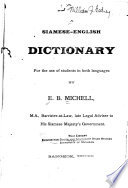

Dictionary of the Lithuanian and English Languages ['Dictionaries']


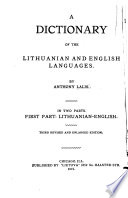

Pocket dictionary of the Portuguese and English languages ['Dictionaries']


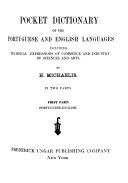

Elsevier's Dictionary of the Gas Industry in Seven Languages: French, English/American, Spanish, Italian, Portuguese, Dutch, German ['Dictionaries']


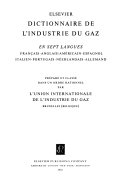

Dictionaries and Grammars in 125 Languages, Including Scientific and Technical Dictionaries ['Dictionaries']


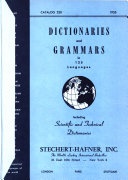

Elsevier's dictionary of barley, malting, and brewing, in six languages ['Brewing industry']


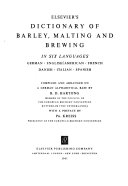

Party and Finger Food ['Appetizers']


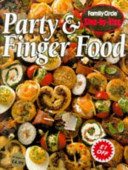

Joe Mauser, Mercenary from Tomorrow ['Fiction']


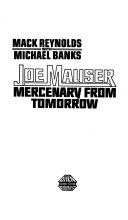

In the Royal Manner ['Cooking']


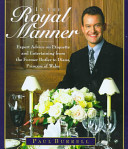

In Black and White ['African American entertainers']


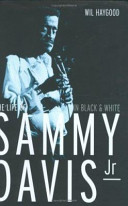

A Dreaming Life ['Artists']


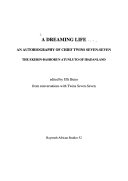

The Girl's Own Book ['Amusements']


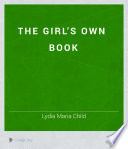

The Oxford Companion to American Food and Drink ['Cooking']


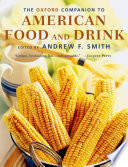

Drink Progressively ['Cooking']


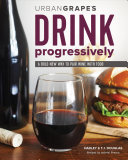

Food, Drink and Identity in Europe ['History']


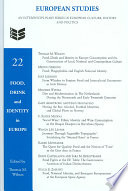

The Oxford Encyclopedia of Food and Drink in America ['Business & Economics']


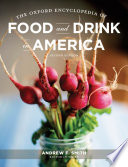

Eat, Drink, and be Merry ['Poetry']


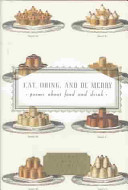

Food and Drink in American History ['COOKING']


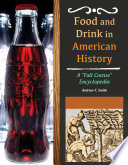

Adding Value nan


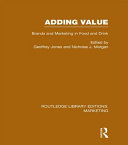

The Oxford Companion to American Food and Drink ['Cooking']


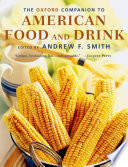

We Shall Eat and Drink Again ['Drinking customs']


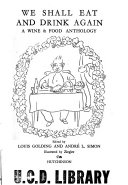

The Diner's Dictionary ['Cooking']


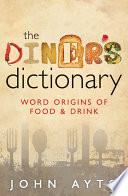

Neon Genesis Evangelion ['Juvenile Fiction']


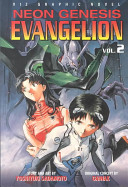

Neon Genesis Evangelion ['Juvenile Fiction']


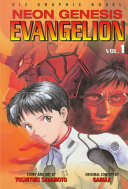

The 4-hour Body ['Health & Fitness']


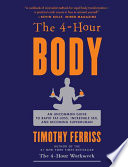

Stop Walking on Eggshells ['Self-Help']


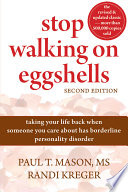

The Art of Preserving Health: ['English poetry']


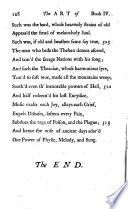

Health; Some Books about it ['Health']


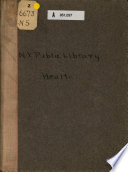

The Tao of Health, Sex, and Longevity ['Family & Relationships']


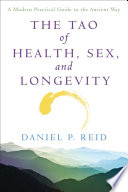

The Pleasures of Imagination ['Health']


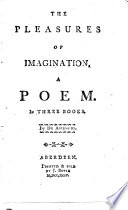

Adventures in Human Being ['Diseases']


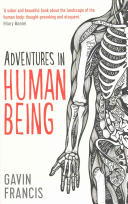

The Art and Science of Low Carbohydrate Living ['Health']


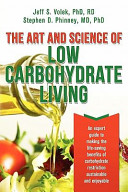

Dr. Dog ['Bacteria']


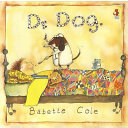

Archaeology For Dummies ['Social Science']


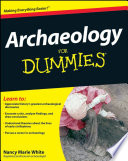

Encyclopedic Dictionary of Archaeology ['Social Science']


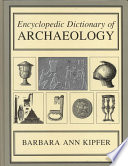

Archaeology: A Very Short Introduction ['Social Science']


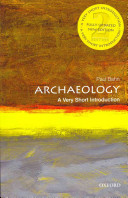

The Archaeology of Weapons ['History']


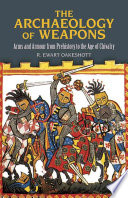

Archaeology in Practice ['Social Science']


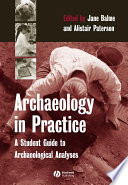

The Archaeology Book ['History']


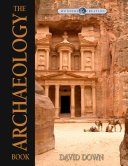

The Oxford Handbook of the Archaeology of the Levant ['History']


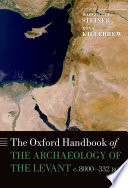

A Companion to Archaeology ['Social Science']


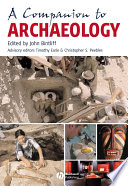

The Oxford Handbook of the Archaeology of the Levant ['History']


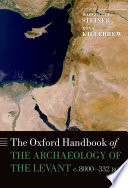

3D Recording and Interpretation for Maritime Archaeology ['Technology & Engineering']


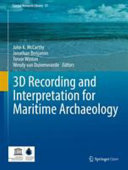

Around the House and in the Garden ['Biography & Autobiography']


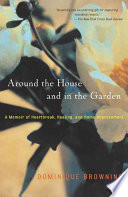

The Place of Home ['HOUSE & HOME']


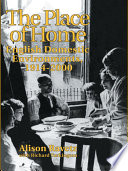

Around the House and in the Garden ['Biography & Autobiography']


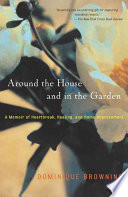

Reader's Digest Complete Book of the Garden ['Biological Sciences']


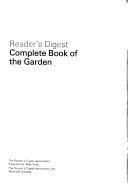

Ideal Homes? ['Social Science']


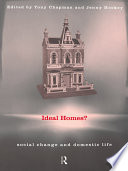

Sacred Space ['House & Home']


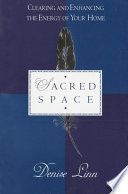

At Home in New Zealand ['Architecture, Domestic']


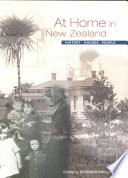

Reader's Digest Complete Book of the Garden ['Biological Sciences']


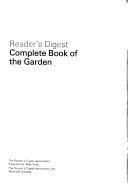

The Sweet Life ['Gardening']


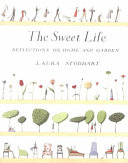

Your Guide to Not Getting Murdered in a Quaint English Village ['Humor']


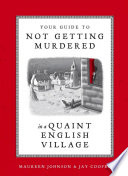

The Third Policeman ['English fiction']


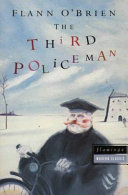

Real Pigeons Peck Punches nan


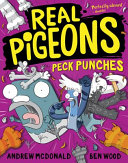

Weir Do ['Australian fiction']


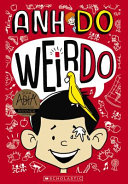

Fing nan


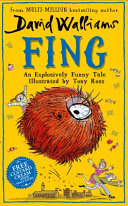

Timmy Failure ['Humorous stories']


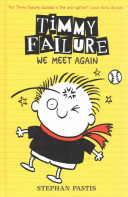

Because a Little Bug Went Ka-choo! ["Children's stories"]


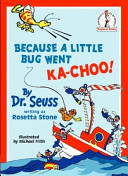

The Poltergoose ["Children's stories"]


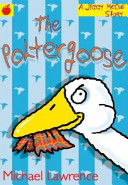

Horrid Henry Wakes the Dead ['Juvenile Fiction']


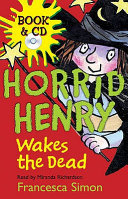

Jacky Ha-Ha ['Behavior']


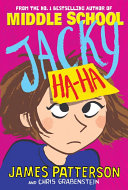

The Hand ['Science']


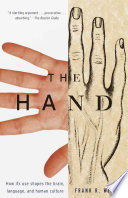

Constructing Cane Rods nan


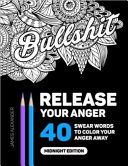

KeyboardInterrupt: 

In [34]:
display_book_samples(google_data)

In [1]:
import os
TEMP_DIR = 'book_cover_temp'

In [35]:


google_data.to_csv(os.path.join(TEMP_DIR, "temp_data.csv"))

In [25]:
google_data = pd.read_csv(os.path.join(TEMP_DIR, "temp_data.csv"))

In [27]:
import shutil
import glob
for category in CATEGORIES:
    TEMP_IMG_DIR = os.path.join(TEMP_DIR, category)
    if os.path.exists(TEMP_IMG_DIR) is False:
        os.mkdir(TEMP_IMG_DIR)
    else:
        # Due to my local setup, the folders has to be deleted manually
        files = files = glob.glob(TEMP_IMG_DIR)
        for file in files:
            os.remove(file)
    temp = google_data[google_data.search_term == category]
    save_book_cover_image(temp, TEMP_IMG_DIR)

Book id: U7oTDAAAQBAJ saved
Book id: uZ-sBAAAQBAJ saved
Book id: lUQHEAAAQBAJ saved
Book id: _OxptFEadFAC saved
Book id: 8f1WMQEACAAJ saved
Book id: ROeT1jj8A0IC saved
Book id: 6xnMsgEACAAJ saved
Book id: I4XUswEACAAJ saved
Book id: XkStswEACAAJ saved
Book id: b-C0rm6hqG4C saved
Book id: 3JiPQgAACAAJ saved
Book id: U84czgEACAAJ saved
Book id: amcXAQAAIAAJ saved
Book id: 8mvazQEACAAJ saved
Book id: DbIQC7tAifgC saved
Book id: 9Xw6AQAAMAAJ saved
Book id: WwlHEAAAQBAJ saved
Book id: 51s6AQAAMAAJ saved
Book id: ZHvtoAEACAAJ saved
Book id: hU2N2waQmWUC saved
Book id: Jb8AQQAACAAJ saved
Book id: 6ohAvgAACAAJ saved
Book id: RWSBQgAACAAJ saved
Book id: mGlatwDULkwC saved
Book id: FAE9AAAAYAAJ saved
Book id: NvyIxwEACAAJ saved
Book id: GUevAgAAQBAJ saved
Book id: LfMrAQAAIAAJ saved
Book id: 7NB3zQEACAAJ saved
Book id: qqaJzQEACAAJ saved
Book id: TqXYAAAAIAAJ saved
Book id: R_9XAAAAYAAJ saved
Book id: EMJTBAAACAAJ saved
Book id: VJsi_zKMlcsC saved
Book id: Qjk01mHxmaEC saved
Book id: kA5KPwAACAA